In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import plotly
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv("Actual-Data/stingar_full-20190520.csv", low_memory = False )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443605 entries, 0 to 1443604
Data columns (total 29 columns):
Unnamed: 0        1443527 non-null object
app               1443597 non-null object
command           722821 non-null object
data              2543 non-null object
dest_ip           1442867 non-null object
dest_port         1443605 non-null object
dionaea_action    195540 non-null object
direction         1443519 non-null object
hash              46150 non-null object
ids_type          1443605 non-null object
protocol          1443605 non-null object
request_url       781 non-null object
sensor            1443519 non-null object
severity          1443519 non-null object
signature         1443519 non-null object
src_ip            1443505 non-null object
src_port          1443519 non-null float64
ssh_password      229399 non-null object
ssh_username      209986 non-null object
ssh_version       50514 non-null object
tags              25772 non-null object
timestamp         144

In [4]:
df.head()

,Unnamed: 0,app,command,data,dest_ip,dest_port,dionaea_action,direction,hash,ids_type,...,ssh_version,tags,timestamp,transport,type,url,username,vendor_product,d_time,d_time_window
0,0,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-20 01:03:50,2019-05-20 01:00:00
1,1,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,NaN,Cowrie,2019-05-20 01:03:50,2019-05-20 01:00:00
2,2,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-20 01:03:50,2019-05-20 01:00:00
3,3,cowrie,enable,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-20 01:03:50,2019-05-20 01:00:00
4,4,cowrie,system,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-20 01:03:50,2019-05-20 01:00:00


Dictionary
========

The data has the following fields:

1. **app** - Honeypot type. Can be cowrie, amun, glastof, dioanea, conpot or rdphoney. Different honeypots capture different attacks/traffic. For example, Cowrie taps in to SSH/Telnet connections.
2. **command** - Commands run by the attacker if they are able to login. It's a string. Typically a location the attacker is trying to pull their attack tools from. Can be a personal workspace.
3. **data** - Base-64 encoded data sent by attacker. **Field exists only for rdphoney**. 
4. **dest_ip** - IP of the docker/honeypot receiving the incoming connection. Not really useful. **DELETED**
5. **dest_port** - Port for the incoming connection as translated by the docker. Original port value unknown as it depends on the internal mapping mechanism of the docker.
6. **dionaea_action** - Action taken by dionaea honeypot. Can be accept, reject, connect or listen.
7. **direction** - inbound only. **Redundant column**. **DELETED**
8. **ids_type** - **Redundant column.** Only IDS type is network. **DELETED**
9. **protocol** - **Redundant column.** As only protocol used is IP. **DELETED**
10. **request_url** - **URL requested by attacker available only for "glastof" honeypot.
11. **sensor** - UUID of honeypot. Unique ID of a honeypot.
12. **severity** - **Redundant column**. Only value is high. **DELETED**
13. **signature** - Honeypot's interpretation of the attack based on its configuration, different for different honeypots. Exploration tells me it is the type of attack.
14. **src_ip** - IP of the attacker. 
15. **src_port** - Port used by the attacker.
16. **ssh_password** - passwords tried by attacker to get in. List of tuples.
17. **ssh_username** - usernames used by attacker to gain access.
18. **ssh_version** - version string passed by attacker while trying to gain access.
19. **tags** - arbitrary info/values that an attacker is allowed is send and will be accepted/stored as tags by the sensor
20. **timestamp** - UTC timestamp of the request. 
21. **transport** - **Redundant column**. Single value. **DELETED**
22. **type** - type of service used by the attacker.
23. **url** - URL requested by the attacker, is extracted from the command field. Convenience filed extracted from 'command' field.
24. **username** - **Redundant field.** **DELETED**
25. **vendor_product** - same as app. **Redundant field**. **DELETED**
26. **d_time** - pulled from timestamp. Local time.
27. **d_time_window** - 5 minutes margin from d_time. 

	

In [5]:
#Drop the redundant columns
df.drop(["direction", "ids_type", "protocol", "severity", "vendor_product", "username"], axis = 1, inplace = True)   
                  

In [6]:
df.drop(["Unnamed: 0"], inplace = True, axis = 1)
df.head()

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
0,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


In [7]:
df['type'].unique()

array(['cowrie.sessions', 'dionaea.connections', 'amun.events',
       'rdphoney.sessions', 'glastopf.events', nan, 'conpot.events-http',
       'conpot.events-modbus', 'conpot.events-s7comm'], dtype=object)

In [8]:
df['tags'].unique()



array([nan, 'localnet,durham,sciencedmz', 'localnet,durham,honeynet',
       'localnet,durham'], dtype=object)

In [9]:
df['signature'].unique()

array(['SSH session on cowrie honeypot',
       'URL download attempted on cowrie honeypot',
       'command attempted on cowrie honeypot',
       'unknown command attempted on cowrie honeypot',
       'File downloaded on cowrie honeypot', 'Connection to Honeypot',
       'SSH login attempted on cowrie honeypot', nan], dtype=object)

In [10]:
df['command'].unique()

array([nan, 'enable', 'system', ..., 'hostname orphic_4437',
       'hostname orphic_8002', 'hostname orphic_8620'], dtype=object)

In [11]:
df['command'].nunique()

2027

In [12]:
df['command'].value_counts()

shell                                                                                                                                                                                                      49388
system                                                                                                                                                                                                     45126
enable                                                                                                                                                                                                     24669
sh                                                                                                                                                                                                         24448
>/tmp/.ptmx && cd /tmp/                                                                                                                                             

In [13]:
df.groupby('signature').describe()

src_port                \
                                                 count          mean   
signature                                                              
Connection to Honeypot                        204674.0  45151.387836   
File downloaded on cowrie honeypot             46142.0  46908.985220   
SSH login attempted on cowrie honeypot        229848.0  46432.991151   
SSH session on cowrie honeypot                172508.0  46739.864586   
URL download attempted on cowrie honeypot      47690.0  46908.726567   
command attempted on cowrie honeypot          662079.0  46916.316438   
unknown command attempted on cowrie honeypot   80578.0  46909.530765   

                                                                               \
                                                       std      min       25%   
signature                                                                       
Connection to Honeypot                        18610.378046      0.0  35291.25   
File downloaded on cowrie honeypot             8203.247382  32770.0  39773.00   
SSH login attempted on cowrie honeypot         8944.351439   1297.0  39457.00   
SSH session on cowrie honeypot                 9255.138568     13.0  39421.00   
URL download attempted on cowrie honeypot      8205.415903  32770.0  39771.00   
command attempted on cowrie honeypot           8154.069348   1675.0  39891.00   
unknown command attempted on cowrie honeypot   8154.406112   1675.0  39918.00   

                                                                          
                                                  50%       75%      max  
signature                                                                 
Connection to Honeypot                        52482.0  58733.00  65535.0  
File downloaded on cowrie honeypot            46838.0  54020.00  60997.0  
SSH login attempted on cowrie honeypot        46606.0  53850.25  65495.0  
SSH session on cowrie honeypot                46878.0  54334.00  65535.0  
URL download attempted on cowrie honeypot     46838.0  54020.00  60997.0  
command attempted on cowrie honeypot          46970.0  53948.00  60998.0  
unknown command attempted on cowrie honeypot  46983.0  53925.00  60998.0

In [14]:
df['data']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
          ... 
1443575    NaN
1443576    NaN
1443577    NaN
1443578    NaN
1443579    NaN
1443580    NaN
1443581    NaN
1443582    NaN
1443583    NaN
1443584    NaN
1443585    NaN
1443586    NaN
1443587    NaN
1443588    NaN
1443589    NaN
1443590    NaN
1443591    NaN
1443592    NaN
1443593    NaN
1443594    NaN
1443595    NaN
1443596    NaN
1443597    NaN
1443598    NaN
1443599    NaN
1443600    NaN
1443601    NaN
1443602    NaN
1443603    NaN
1443604    NaN
Name: data, Length: 1443605, dtype: object

In [15]:
df['data'].unique()

array([nan,
       'AwAAKybgAAAAAABDb29raWU6IG1zdHNoYXNoPWhlbGxvDQoBAAgAAwAAAA==',
       'R0VUIC8gSFRUUC8xLjANCg0K',
       'FgMBAH8BAAB7AwPnwfLauL2qDCXJ1XD6M0YqAAAV2QkPDK7huoCobXXz/QAAHMAvwCvAMMAswBPACcAUwAoAnACdAC8ANcASAAoBAAA2AAUABQEAAAAAAAoACAAGABcAGAAZAAsAAgEAAA0ADgAMBAEEAwUBBQMCAQID/wEAAQAAEgAA',
       'FgMBAH8BAAB7AwNr76CY3A6aP6BAcc/3xihn+JwWXE3N+Ed7eIe0yd1N7gAAHMAvwCvAMMAswBPACcAUwAoAnACdAC8ANcASAAoBAAA2AAUABQEAAAAAAAoACAAGABcAGAAZAAsAAgEAAA0ADgAMBAEEAwUBBQMCAQID/wEAAQAAEgAA',
       'FgMBAH8BAAB7AwPZmC5c+U2SuQhJrWoeGs4RyY8J6TDPPmwYbBPbckVLgQAAHMAvwCvAMMAswBPACcAUwAoAnACdAC8ANcASAAoBAAA2AAUABQEAAAAAAAoACAAGABcAGAAZAAsAAgEAAA0ADgAMBAEEAwUBBQMCAQID/wEAAQAAEgAA',
       'FgMBAH8BAAB7AwO8Kq1kCUdZgeN1V0z1PfCb1ovATtrfTlle30W2sIS/zQAAHMAvwCvAMMAswBPACcAUwAoAnACdAC8ANcASAAoBAAA2AAUABQEAAAAAAAoACAAGABcAGAAZAAsAAgEAAA0ADgAMBAEEAwUBBQMCAQID/wEAAQAAEgAA',
       'AwAAHxrgAAAAAABDb29raWU6IG1zdHNoYXNoPWENCg==',
       'FgMBAH8BAAB7AwP2REH+Nhp4htZ2/rDWU0IBSj3aEZ6UbbqGH0tIR3x/NAAAHMAvwCvAMMA

In [16]:
#Destination IP is not useful and hence we can drop the column
df.head()

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
0,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


In [17]:
df['dest_port']

0          2223
1          2223
2          2223
3          2223
4          2223
5          2223
6          2223
7          2223
8          2223
9          2223
10         2223
11         2223
12         2223
13         2223
14         2223
15         2223
16         2223
17         2223
18         2223
19         2223
20         2223
21         2223
22         2223
23         2223
24         2223
25         2223
26         2223
27         2223
28         2223
29         2223
           ... 
1443575    2223
1443576    2223
1443577    2223
1443578    2223
1443579    2223
1443580    2223
1443581    2223
1443582    2223
1443583    2223
1443584    2223
1443585    2223
1443586    2223
1443587    2223
1443588    2223
1443589    2223
1443590    2223
1443591    2223
1443592    2223
1443593    2223
1443594    2223
1443595    2223
1443596    2223
1443597    2223
1443598    2223
1443599    2223
1443600    2222
1443601     445
1443602     445
1443603     445
1443604     445
Name: dest_port, Length:

In [18]:
df['dest_port'].value_counts()

2223               1183711
445                 120574
2222                 55134
1433                 45348
23                   22980
3389                  8446
80                    5618
3306                   758
443                    166
21                     117
1723                   105
27017                   99
5061                    95
tcp                     78
5060                    76
135                     69
5000                    53
11211                   41
69                      32
1900                    28
123                     23
0                       19
cowrie.sessions          8
1883                     5
102                      4
502                      4
39802                    1
39130                    1
36778                    1
45279                    1
33463                    1
38559                    1
38507                    1
43990                    1
42657                    1
46158                    1
34101                    1
3

In [19]:
df[df['dest_port'] == 'cowrie.sessions']

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
1362211,NaN,NaN,2019-05-20T21:28:25.505406,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362677,NaN,NaN,2019-05-20T21:29:01.515694,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362810,NaN,NaN,2019-05-20T21:29:15.404861,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362952,NaN,NaN,2019-05-20T21:29:23.054861,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395301,NaN,NaN,2019-05-20T18:31:37.041848,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395340,NaN,NaN,2019-05-20T18:31:42.997388,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395430,NaN,NaN,2019-05-20T18:32:01.164177,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395443,NaN,NaN,2019-05-20T18:32:07.595215,tcp,cowrie.sessions,NaN,Cowrie,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Cowrie Sessions Data is pretty useless. Might as well drop the rows
df.drop(df.index[df[df['dest_port'] == 'cowrie.sessions'].index], inplace = True)

In [21]:
df['dest_port'].value_counts()

2223     1183711
445       120574
2222       55134
1433       45348
23         22980
3389        8446
80          5618
3306         758
443          166
21           117
1723         105
27017         99
5061          95
tcp           78
5060          76
135           69
5000          53
11211         41
69            32
1900          28
123           23
0             19
1883           5
102            4
502            4
38507          1
39130          1
36778          1
45279          1
38559          1
33463          1
43990          1
39802          1
42657          1
46158          1
37575          1
34101          1
42398          1
34950          1
Name: dest_port, dtype: int64

In [22]:
df[df['dest_port'] == 'tcp'].index

Int64Index([ 424686,  425462,  564380,  576507,  577335,  797369,  841875,
             845417,  868284,  869736,  872214,  882816, 1015735, 1017653,
            1052708, 1106923, 1130405, 1130450, 1131547, 1135893, 1173290,
            1174018, 1187711, 1187799, 1191382, 1200559, 1201404, 1222882,
            1232904, 1232914, 1233088, 1234255, 1235282, 1269311, 1270166,
            1270176, 1270526, 1281464, 1287811, 1287931, 1287945, 1297506,
            1297554, 1299465, 1316653, 1317236, 1342169, 1342963, 1343779,
            1355619, 1355790, 1357947, 1358513, 1371450, 1372153, 1375965,
            1377729, 1384984, 1385199, 1385542, 1391713, 1391720, 1393624,
            1393937, 1406409, 1409458, 1411866, 1413412, 1422240, 1422787,
            1430955, 1431187, 1431584, 1437555, 1438272, 1440144, 1440181,
            1440847],
           dtype='int64')

In [23]:
df["src_ip"]

0          198.199.89.115
1          198.199.89.115
2          198.199.89.115
3          198.199.89.115
4          198.199.89.115
5          198.199.89.115
6          198.199.89.115
7          198.199.89.115
8          198.199.89.115
9          198.199.89.115
10         198.199.89.115
11         198.199.89.115
12         198.199.89.115
13         198.199.89.115
14         198.199.89.115
15         198.199.89.115
16         198.199.89.115
17         198.199.89.115
18         198.199.89.115
19         198.199.89.115
20         198.199.89.115
21         198.199.89.115
22         198.199.89.115
23         198.199.89.115
24         198.199.89.115
25         198.199.89.115
26         198.199.89.115
27         198.199.89.115
28         198.199.89.115
29         198.199.89.115
                ...      
1443575     185.244.25.85
1443576     185.244.25.85
1443577     185.244.25.85
1443578     185.244.25.85
1443579     185.244.25.85
1443580     185.244.25.85
1443581     185.244.25.85
1443582     

In [24]:
df.drop(df.index[df[df['dest_port'] == 'tcp'].index], inplace = True)

In [25]:
df['dest_port'].value_counts()

2223     1183701
445       120569
2222       55128
1433       45348
23         22978
3389        8444
80          5618
3306         758
443          166
21           117
1723         105
27017         99
5061          95
5060          76
135           69
5000          53
11211         41
69            32
1900          28
tcp           25
123           23
0             19
1883           5
102            4
502            4
38507          1
39130          1
36778          1
45279          1
38559          1
33463          1
43990          1
39802          1
42657          1
46158          1
37575          1
34101          1
42398          1
34950          1
Name: dest_port, dtype: int64

In [26]:
df.head()

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
0,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


In [27]:
df.head()

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
0,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


Let's explore the signature column

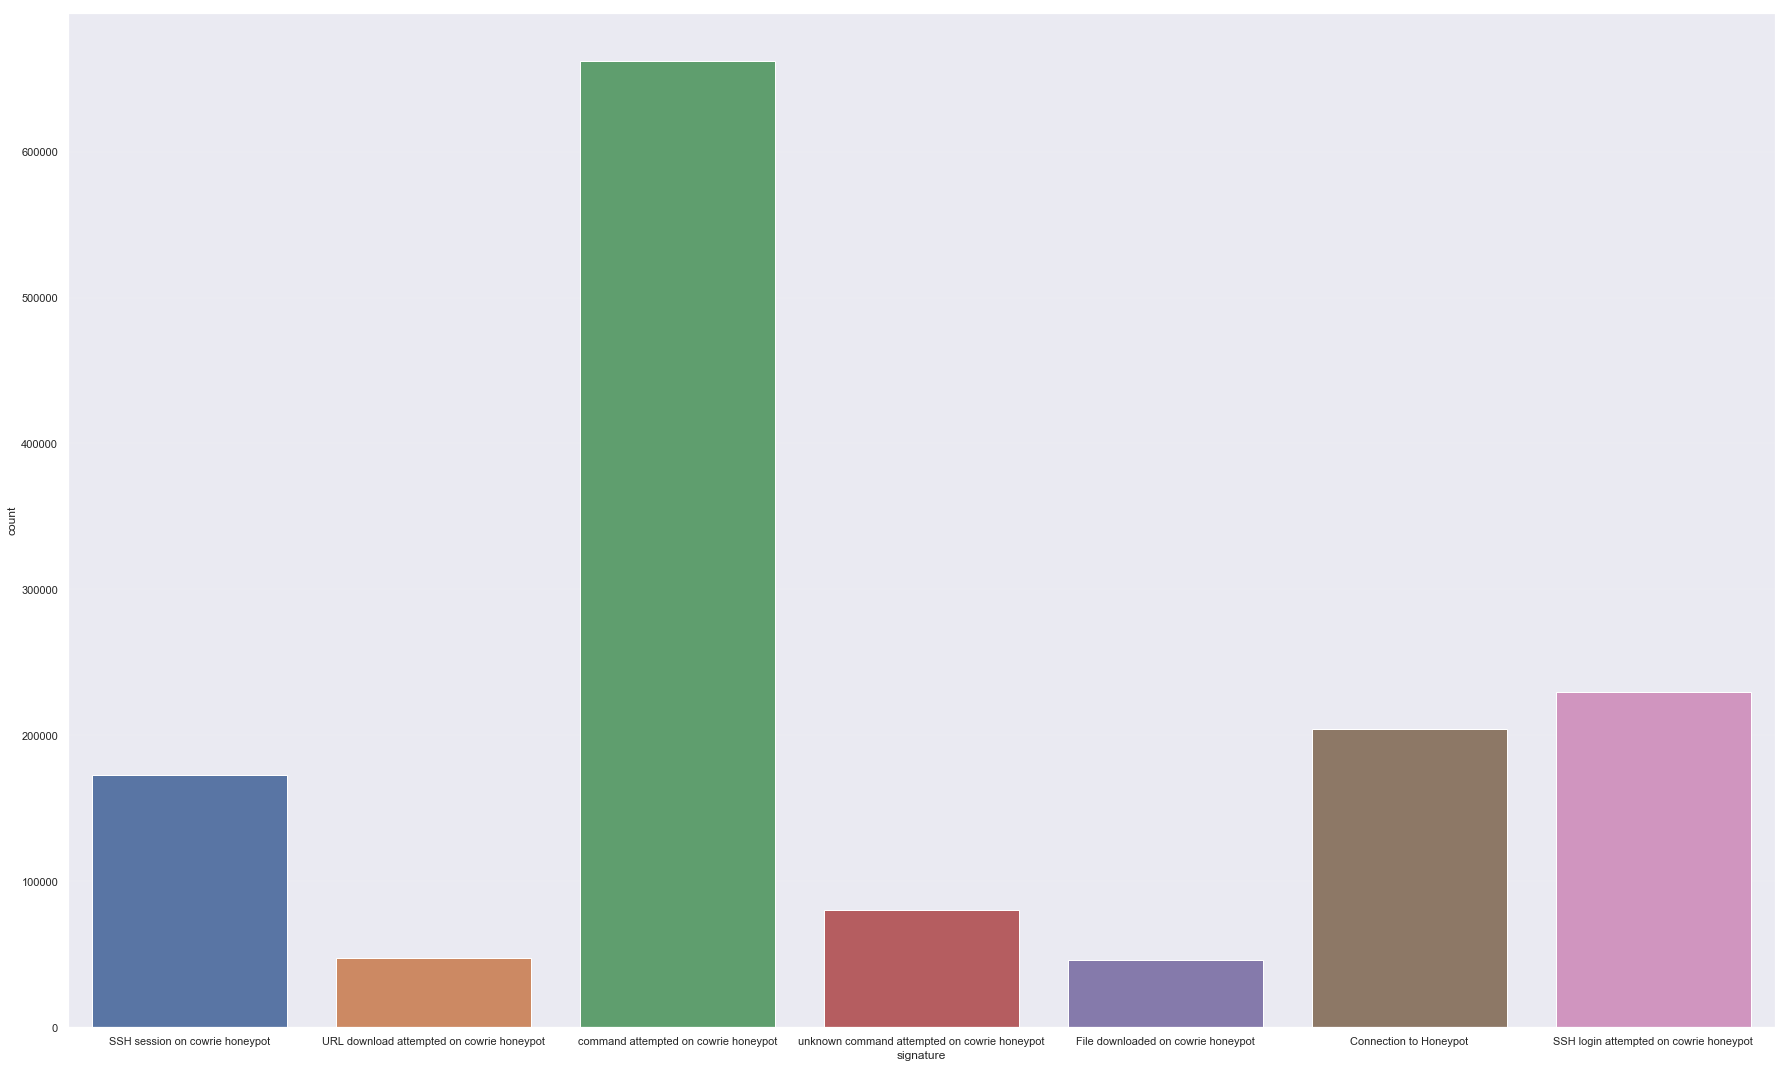

In [28]:
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
fig = plt.figure(figsize = (25,15))
sns.countplot(x = "signature", data = df)
plt.tight_layout()

In [29]:
df['app'].value_counts()

cowrie        1238829
dionaea        195455
amun             5800
rdphoney         2645
glastopf          738
conpot             27
samba               2
cvs                 1
arnaud              1
prueba              1
torrent             1
serveur             1
michael             1
www                 1
alex                1
sophie              1
wwwrun              1
weblogic            1
jhon                1
public              1
info                1
mysql               1
henning             1
cssserver           1
ftpuser             1
acccode             1
teamspeak3          1
test                1
dani                1
hexer               1
Name: app, dtype: int64

We need to drop all the rows apart from 



cowrie         1238845
dionaea        195462
amun             5801
rdphoney         2646
glastopf          738
conpot             27

In [30]:
new_frame = df[(df['app'] == 'cowrie') | (df['app'] == 'dionaea') | (df['app'] == "amun") | (df['app'] == 'rdphoney') | (df['app'] == 'glastopf') | (df['app'] == 'conpot')].copy()   

In [31]:
new_frame.head()

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
0,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,NaN,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,NaN,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,NaN,NaN,NaN,NaN,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


In [32]:
new_frame['app'].value_counts()

cowrie      1238829
dionaea      195455
amun           5800
rdphoney       2645
glastopf        738
conpot           27
Name: app, dtype: int64

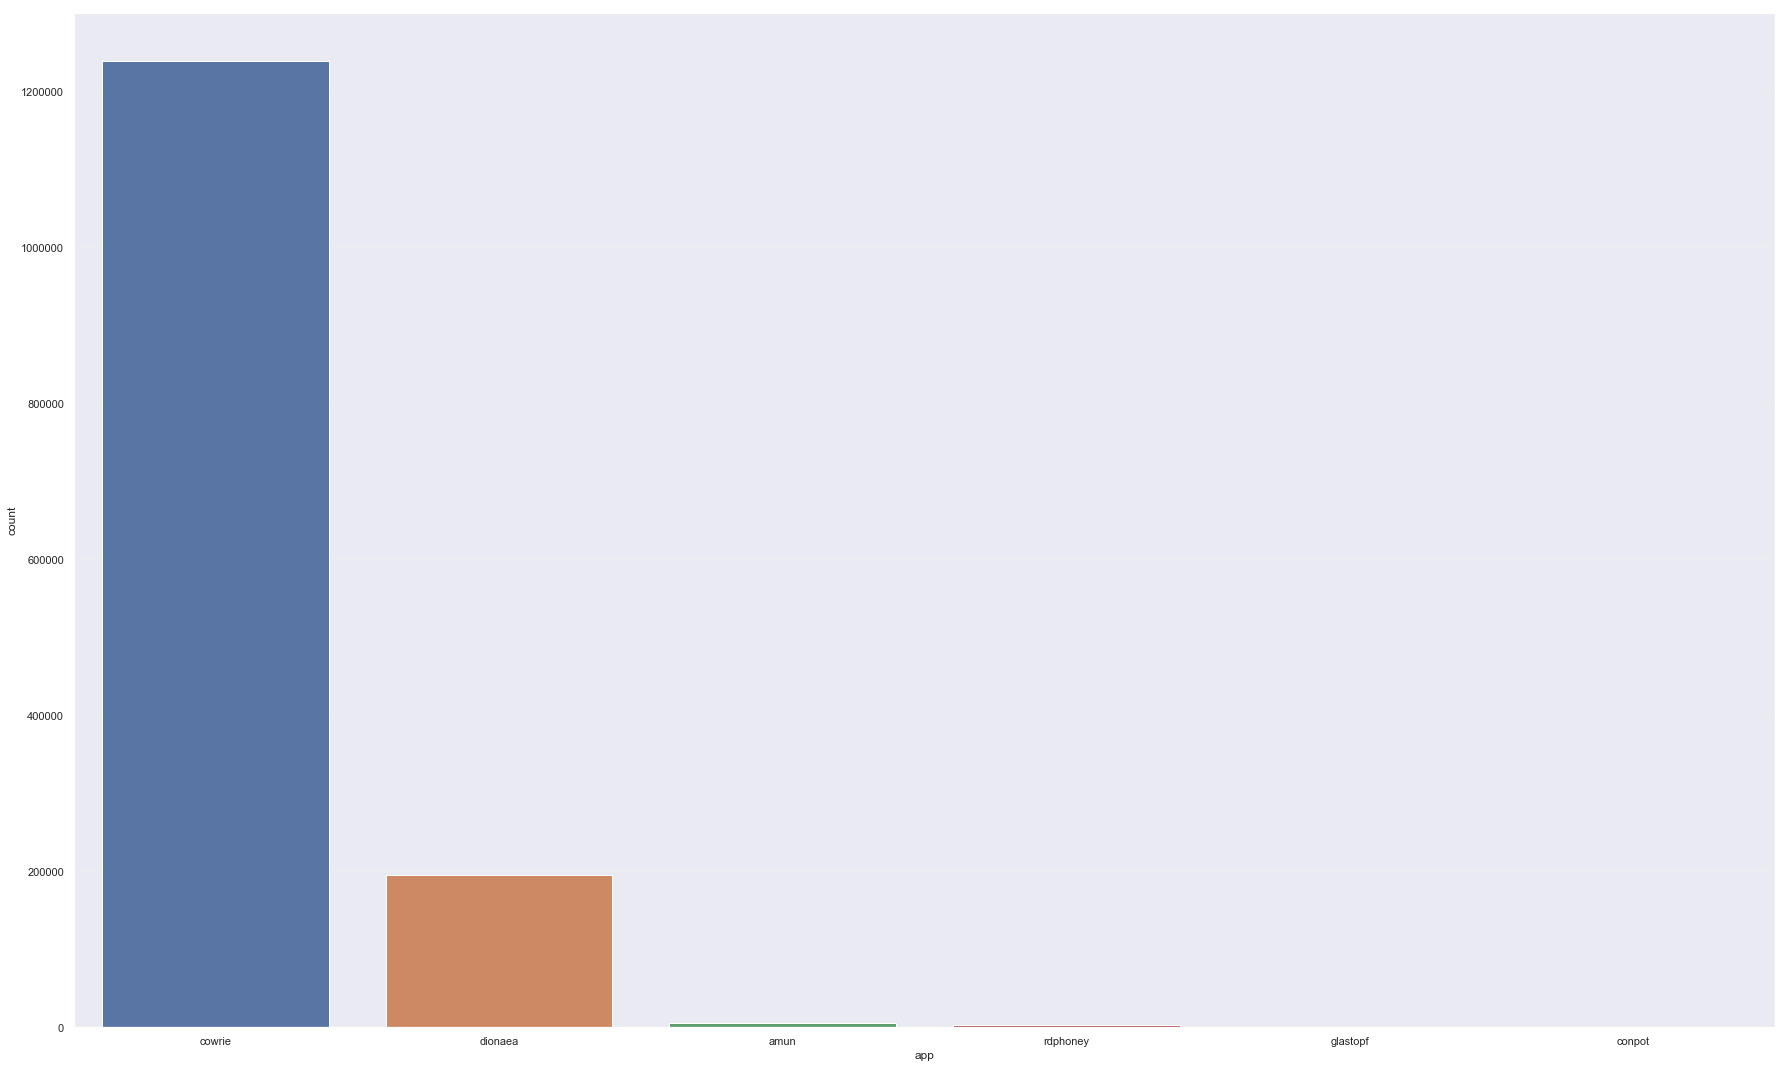

In [33]:
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
fig = plt.figure(figsize = (25,15))
sns.countplot(x = "app", data = new_frame)
plt.tight_layout()

In [34]:
new_frame['dest_port'].value_counts()

2223     1183701
445       120569
2222       55128
1433       45348
23         22978
3389        8444
80          5618
3306         758
443          166
21           117
1723         105
27017         99
5061          95
5060          76
135           69
5000          53
11211         41
69            32
1900          28
123           23
0             19
1883           5
102            4
502            4
39802          1
38559          1
36778          1
45279          1
33463          1
39130          1
43990          1
38507          1
42657          1
46158          1
34101          1
37575          1
42398          1
34950          1
Name: dest_port, dtype: int64

In [35]:
new_frame['dionaea_action'].value_counts()

accept     195027
reject        326
connect        88
listen         14
Name: dionaea_action, dtype: int64

In [36]:
new_frame['command'].value_counts()

shell                                                                                                                                                                                                      49388
system                                                                                                                                                                                                     45126
enable                                                                                                                                                                                                     24668
sh                                                                                                                                                                                                         24448
>/.ptmx && cd /                                                                                                                                                     

In [37]:
new_frame['data'].value_counts()

AwAAKybgAAAAAABDb29raWU6IG1zdHNoYXNoPWhlbGxvDQoBAAgAAwAAAA==                                                                                                                                                                                        1929
AwAAKiXgAAAAAABDb29raWU6IG1zdHNoYXNoPVRlc3QNCgEACAADAAAA                                                                                                                                                                                             100
AwAAHxrgAAAAAABDb29raWU6IG1zdHNoYXNoPWENCg==                                                                                                                                                                                                          45
AwAAKiXgAAAAAABDb29raWU6IG1zdHNoYXNoPW5tYXANCgEACAADAAAA                                                                                                                                                                                              36
AwAA

In [38]:
new_frame['ssh_password'].value_counts()

shell                                                                                                              23596
enable                                                                                                             21237
>/usr/.ptmx && cd /usr/                                                                                            19370
>/tmp/.ptmx && cd /tmp/                                                                                            19370
>/dev/shm/.ptmx && cd /dev/shm/                                                                                    19370
>/dev/.ptmx && cd /dev/                                                                                            19370
>/.ptmx && cd /                                                                                                    19370
>/var/run/.ptmx && cd /var/run/                                                                                    19369
>/etc/.ptmx && cd /etc/         

In [39]:
new_frame['src_ip'].value_counts()

68.183.18.206      141748
185.244.25.200     139903
198.199.89.115     137063
185.244.25.166     111072
192.236.176.80     100417
209.97.184.49       80874
188.166.113.224     79323
185.244.25.85       78647
54.38.79.86         65486
205.185.113.25      41186
185.244.25.107      28517
185.244.25.203      26030
107.173.145.191     15612
185.244.25.164      15088
185.244.25.190      14087
104.243.44.230      11499
185.244.25.177      11408
165.227.49.241       7402
206.189.132.104      6882
185.246.128.25       5978
35.229.212.46        5859
200.155.63.129       5183
178.33.83.72         3978
62.210.207.229       3813
51.158.163.189       3691
46.101.118.201       3458
5.188.86.172         3261
185.220.221.221      3040
157.230.22.156       2971
5.188.86.173         2928
                    ...  
180.253.21.146          1
103.209.205.246         1
149.200.241.141         1
189.153.37.93           1
83.234.218.40           1
162.243.143.243         1
24.31.188.96            1
190.207.145.

In [40]:
new_frame['src_port'].value_counts()

42862.0    342
37407.0    302
33908.0    300
39667.0    298
60962.0    296
51421.0    274
46755.0    273
36714.0    265
50627.0    265
39708.0    259
60106.0    259
47979.0    246
43388.0    245
48215.0    242
51049.0    237
50008.0    236
55880.0    236
47599.0    232
52600.0    231
47412.0    230
57333.0    229
54484.0    229
34160.0    223
43564.0    223
45002.0    222
49967.0    221
53519.0    220
51675.0    220
52201.0    219
46195.0    219
          ... 
1868.0       1
1888.0       1
29892.0      1
29894.0      1
19071.0      1
19069.0      1
19068.0      1
19100.0      1
29870.0      1
19102.0      1
19125.0      1
19133.0      1
19132.0      1
3939.0       1
19131.0      1
19130.0      1
19129.0      1
19128.0      1
19126.0      1
29854.0      1
19103.0      1
29857.0      1
29858.0      1
19119.0      1
29864.0      1
19117.0      1
19113.0      1
29866.0      1
19109.0      1
8191.0       1
Name: src_port, Length: 56160, dtype: int64

In [41]:
new_frame['ssh_version'].value_counts()

'SSH-2.0-Go'                                                                                                                                                                                                                       34757
'SSH-2.0-OpenSSH_7.3'                                                                                                                                                                                                               4066
'SSH-2.0-libssh2_1.4.3'                                                                                                                                                                                                             2180
'SSH-2.0-PUTTY'                                                                                                                                                                                                                     1365
'SSH-2.0-libssh2_1.8.2'                                             

In [42]:
new_frame['tags'].value_counts()

localnet,durham,honeynet      14495
localnet,durham,sciencedmz    10805
localnet,durham                 468
Name: tags, dtype: int64

In [43]:
df['tags'].value_counts()

localnet,durham,honeynet      14495
localnet,durham,sciencedmz    10805
localnet,durham                 468
Name: tags, dtype: int64

In [44]:
new = pd.read_csv("Actual-Data/stingar_full-20190520.csv", low_memory = False )
new['tags'].value_counts()

localnet,durham,honeynet      14497
localnet,durham,sciencedmz    10807
localnet,durham                 468
Name: tags, dtype: int64

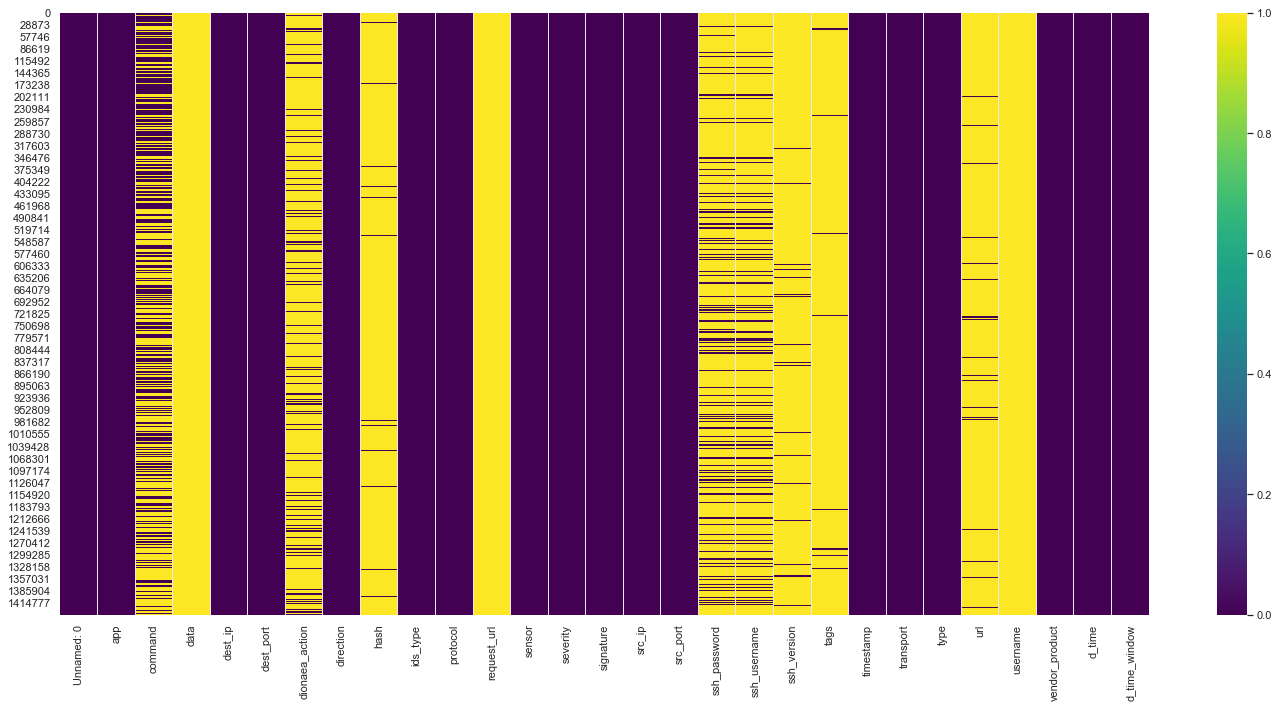

In [45]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(new.isnull(), cmap="viridis")
plt.tight_layout()

In [46]:
new['tags'].count()

25772

In [47]:
values = {"tags": "cloud"}
new_frame.fillna(values, inplace = True)

In [48]:
new_frame['tags'].value_counts()

cloud                         1417726
localnet,durham,honeynet        14495
localnet,durham,sciencedmz      10805
localnet,durham                   468
Name: tags, dtype: int64

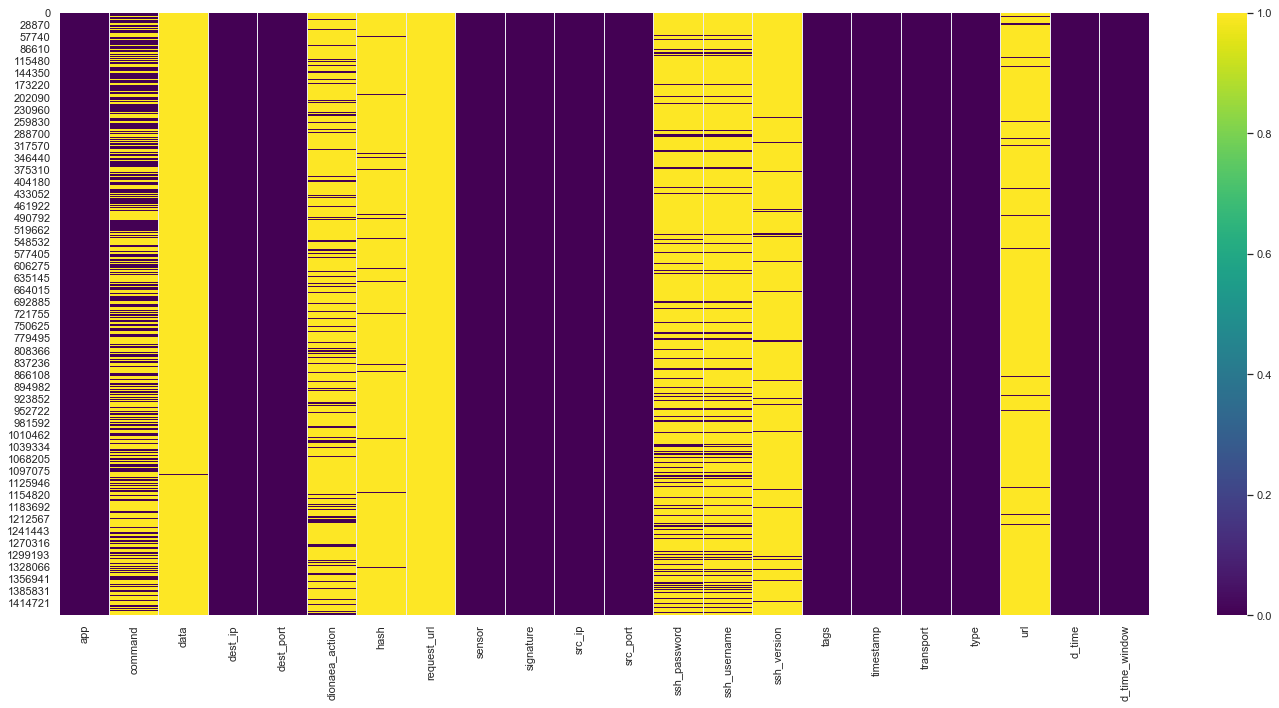

In [49]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(new_frame.isnull(), cmap="viridis")
plt.tight_layout()

In [50]:
new_frame["request_url"].value_counts()

http://159.65.35.61:8080/                                                                                         32
http://46.101.199.204:8080/                                                                                       30
http://178.128.228.159:8080/                                                                                      25
http://142.93.29.207:8080/                                                                                        24
http://46.101.86.1:8080/                                                                                          24
http://159.89.163.189:8080/                                                                                       22
http://206.189.34.9:8080/                                                                                         22
http://152.3.102.249:8080/                                                                                        13
http://68.183.24.124:8080/                                      

In [51]:
new_frame['request_url'].count()

703

In [52]:
new_frame['url'].count()

47690

In [53]:
new_frame['url'].value_counts()

/dev/.nippon                                             5945
/.nippon                                                 5235
/dev/shm/.nippon                                         4824
/run/lock/.nippon                                        4820
/home/.nippon                                            4820
/run/.nippon                                             4819
/boot/.nippon                                            4818
http://185.244.25.185:80/bins/tuna.x86                   4301
http://209.97.184.49:80/lmaoWTF/loligang.x86             1833
http://185.244.25.85:80/824982536/Nakuma.x86             1532
http://185.244.25.166:80/bins/UnHAnaAW.x86               1445
http://192.236.176.80:80/bins/orphic.x86                 1191
http://54.38.79.86:80/bins/hoho.x86                       489
http://185.244.25.190:80/lmaoWTF/erectile.x86             188
http://107.173.145.191:80/bins/UnHAnaAW.x86               187
http://185.244.25.177:80/ok/oka.x86                       168
http://2

,Total,Percent
request_url,1442791,0.999513
data,1440960,0.998245
hash,1397352,0.968035
url,1395804,0.966962
ssh_version,1392986,0.965010


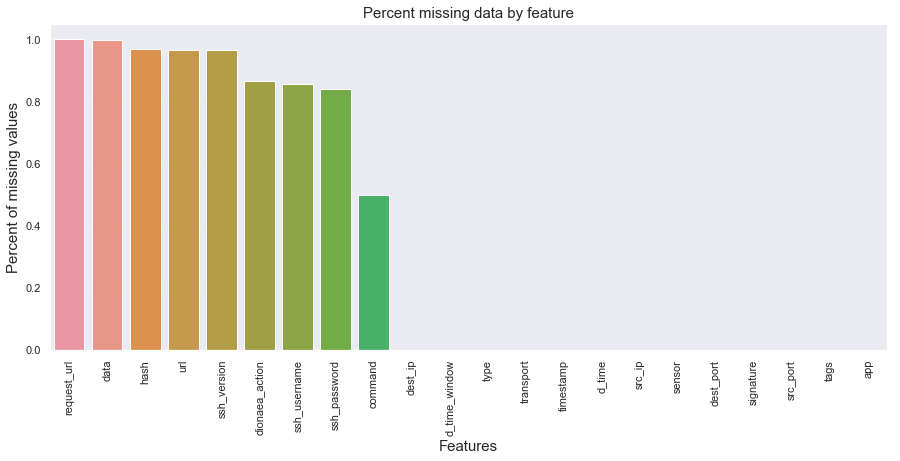

In [54]:
total = new_frame.isnull().sum().sort_values(ascending=False)
percent = (new_frame.isnull().sum()/new_frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [55]:
new_frame['command'].fillna(value = "exit", inplace = True)

In [56]:
new_frame['command'].value_counts()

exit                                                                                                                                                                                                       720753
shell                                                                                                                                                                                                       49388
system                                                                                                                                                                                                      45126
enable                                                                                                                                                                                                      24668
sh                                                                                                                                                              

In [57]:
new_frame['ssh_password'].fillna(method = "bfill", inplace = True)

In [58]:
new_frame['ssh_password'].value_counts()

enable                                                                                             675470
shell                                                                                              108803
sh                                                                                                  66126
..                                                                                                  52001
system                                                                                              36663
linuxshell                                                                                          24801
>/etc/.ptmx && cd /etc/                                                                             20269
>/dev/shm/.ptmx && cd /dev/shm/                                                                     19370
>/usr/.ptmx && cd /usr/                                                                             19370
>/dev/.ptmx && cd /dev/                       

In [59]:
new_frame.command.value_counts()

exit                                                                                                                                                                                                       720753
shell                                                                                                                                                                                                       49388
system                                                                                                                                                                                                      45126
enable                                                                                                                                                                                                      24668
sh                                                                                                                                                              

In [60]:
new_frame.ssh_version.value_counts()

'SSH-2.0-Go'                                                                                                                                                                                                                       34757
'SSH-2.0-OpenSSH_7.3'                                                                                                                                                                                                               4066
'SSH-2.0-libssh2_1.4.3'                                                                                                                                                                                                             2180
'SSH-2.0-PUTTY'                                                                                                                                                                                                                     1365
'SSH-2.0-libssh2_1.8.2'                                             

In [61]:
new_frame.ssh_password.fillna("none",inplace=True)
new_frame.ssh_version.fillna("SSH-2.0-OpenSSH_7.3", inplace = True)
new_frame.dionaea_action.fillna("Not Applicable", inplace = True)

In [62]:
new_frame.dionaea_action.value_counts()

Not Applicable    1248039
accept             195027
reject                326
connect                88
listen                 14
Name: dionaea_action, dtype: int64

,Total,Percent
request_url,1442791,0.999513
data,1440960,0.998245
hash,1397352,0.968035
url,1395804,0.966962
ssh_username,1233515,0.854534


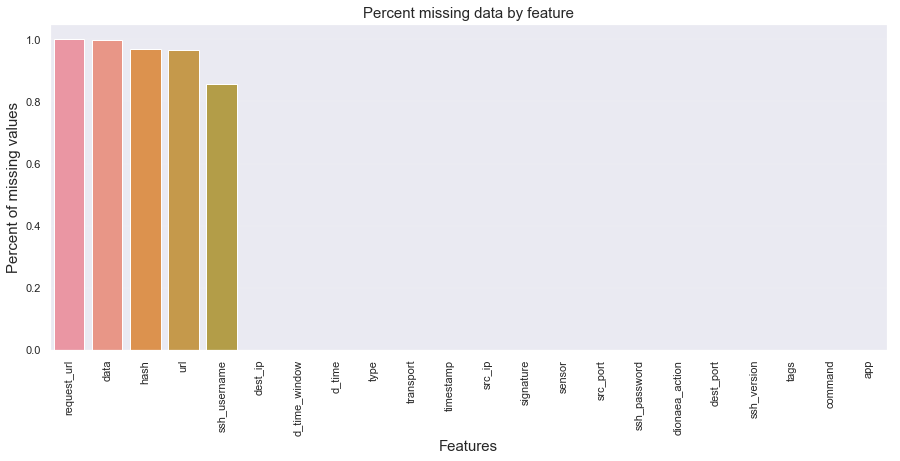

In [63]:
total = new_frame.isnull().sum().sort_values(ascending=False)
percent = (new_frame.isnull().sum()/new_frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [64]:
new_frame.hash.value_counts()

621c061dcf2120c74bda9ab2ef1b16790c433ffece1e1df5a5f863b18e3da538    4820
6a258b079141b172b33a503d7754702fa8b101ddb07957b71e2c1fcd1201715c    4820
19a34e6b661946f1dbbfee814c3e1f81b9cefdfd9e759434f338509f447befb9    4820
4ba7955eabd123c229edc3a85b8ccdb925f298780e3eab90a2e605d401b6bd3d    4819
c1bc02f07b7473393978b3db825f870aa4be5622aef289805f7b8c0d86017fb4    4818
0a620f7d4afdd219606bed1606da5faed1e0925ceeaa30187e11fb05248b0998    4407
e3df4475f7aa746c8a8b54c40e14f3d521db6e69f621656b3e55d8b6ceb57c58    4301
4661c2c5d8280bd250a87a2cb7778eaa6554baea0b3518582f36e2d4288a3e91    3695
66eadb867985248713698d8737332de766b63059824567b579772e35f7bb4a5c    1833
b5723ce6e9bc344c497489e2d5e6bbdc79c319611f20e884157e6dbc38e5a61b    1532
ac972b37e3bf8e779ce672f8c6480705bb366299bb19470daaf6fb43fdd8b9a1    1445
3e34fabb120d0ea0b7ca9f91a2014672ba1bea64afcb674607a4f0e69b4aab22    1191
4af5a5c98ad132095c6fbe7b02c242153a190a01cc321e50a916a0ca46fbaa62    1125
183ee8d98dede9961205a13f5f2a93af4875e648350dfc91a0d

In [65]:
new_frame.head()

,app,command,data,dest_ip,dest_port,dionaea_action,hash,request_url,sensor,signature,...,ssh_password,ssh_username,ssh_version,tags,timestamp,transport,type,url,d_time,d_time_window
0,cowrie,exit,NaN,172.18.0.2,2223,Not Applicable,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,...,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121451,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,exit,NaN,172.18.0.2,2223,Not Applicable,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,...,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121690,tcp,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,exit,NaN,172.18.0.2,2223,Not Applicable,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121797,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,Not Applicable,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121854,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,Not Applicable,NaN,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,...,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121906,tcp,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


In [66]:
new_frame.drop(['hash'], axis =1 , inplace=True)

,Total,Percent
request_url,1442791,0.999513
data,1440960,0.998245
url,1395804,0.966962
ssh_username,1233515,0.854534
dest_ip,738,0.000511


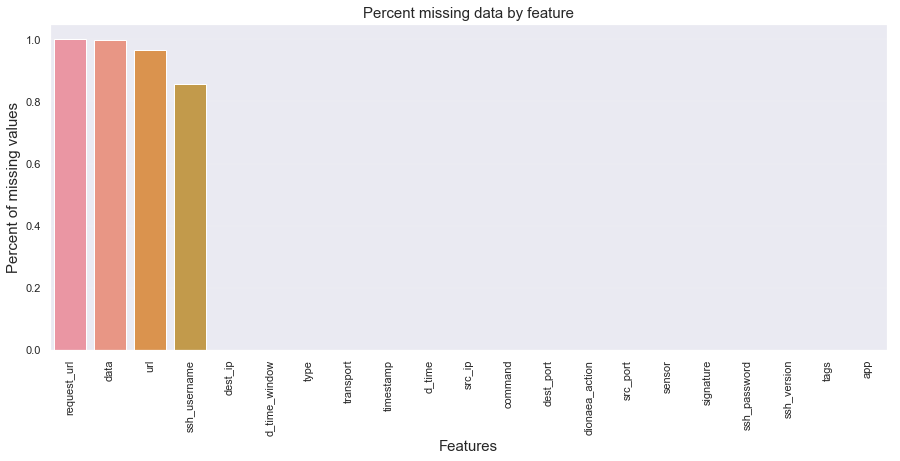

In [67]:
total = new_frame.isnull().sum().sort_values(ascending=False)
percent = (new_frame.isnull().sum()/new_frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [68]:
new_frame.drop(columns=['transport'], inplace=True)

In [69]:
new_frame['dest_ip'].value_counts()

172.18.0.2       1397546
172.19.0.2         37357
172.17.0.4          5181
0.0.0.0             2645
152.3.102.253         27
Name: dest_ip, dtype: int64

In [70]:
new_frame['dest_port'].value_counts()

2223     1183701
445       120569
2222       55128
1433       45348
23         22978
3389        8444
80          5618
3306         758
443          166
21           117
1723         105
27017         99
5061          95
5060          76
135           69
5000          53
11211         41
69            32
1900          28
123           23
0             19
1883           5
102            4
502            4
39802          1
38559          1
36778          1
45279          1
33463          1
39130          1
43990          1
38507          1
42657          1
46158          1
34101          1
37575          1
42398          1
34950          1
Name: dest_port, dtype: int64

In [71]:
new_frame.head()

,app,command,data,dest_ip,dest_port,dionaea_action,request_url,sensor,signature,src_ip,src_port,ssh_password,ssh_username,ssh_version,tags,timestamp,type,url,d_time,d_time_window
0,cowrie,exit,NaN,172.18.0.2,2223,Not Applicable,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,SSH session on cowrie honeypot,198.199.89.115,44023.0,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121451,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
1,cowrie,exit,NaN,172.18.0.2,2223,Not Applicable,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,URL download attempted on cowrie honeypot,198.199.89.115,44023.0,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121690,cowrie.sessions,http://185.244.25.185:80/bins/tuna.x86,2019-05-20 01:03:50,2019-05-20 01:00:00
2,cowrie,exit,NaN,172.18.0.2,2223,Not Applicable,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,198.199.89.115,44023.0,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121797,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
3,cowrie,enable,NaN,172.18.0.2,2223,Not Applicable,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,198.199.89.115,44023.0,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121854,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00
4,cowrie,system,NaN,172.18.0.2,2223,Not Applicable,NaN,cfd4dc54-499e-43d9-848a-1e390a7c984a,command attempted on cowrie honeypot,198.199.89.115,44023.0,enable,NaN,SSH-2.0-OpenSSH_7.3,cloud,2019-05-20T05:03:50.121906,cowrie.sessions,NaN,2019-05-20 01:03:50,2019-05-20 01:00:00


In [72]:
new_frame['sensor'].value_counts()

21b41687-cea3-4a36-afdf-1dbff7612aaa    433000
cfd4dc54-499e-43d9-848a-1e390a7c984a    213520
e15006af-0a5c-4e9e-b8cc-4e6d35c02bcb    200068
970757c6-1b54-42d6-8b99-076d30e81ccd    137550
d3ba9246-d6a7-4370-9369-47e707ee17fd    103608
26db3f05-b75c-41ca-84cb-113cf74d7ce1     67496
fdd6134e-08a7-49d3-90d7-5499916077a4     37448
c5aa1f90-812b-4bf8-9ac5-219b757ba7b1     28936
872ed998-5f96-47c9-91a6-a6970ed2535c     26390
14f9bcb6-2325-43ef-83a8-ac3c8a544681     25456
ea526246-9523-4b18-8d74-1b3049467f91     25446
41e1395a-95c5-49a9-8b76-0028e2b0d114     20501
3100eaa2-c24c-42c4-8a88-e4619269f447     18431
de61ed70-26c8-4482-a1c0-280945212d73     16126
f63a3455-885a-4e9b-a3f4-bd3eb1bf5160     15802
53a71a81-7a04-4640-b70c-20283939c259     14495
6ba6a97a-2b2c-4279-afd9-3a9f8254ef90     12300
49eed2a1-83a4-4968-90cf-1235dd6f88fa     11911
a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee     11031
49797144-df1a-424a-841f-3b3faaf19506      6710
6fc6df50-bee2-453b-9f01-42e438bd22f7      6048
c9f4c148-322c

In [73]:
df['ssh_password'].value_counts()

shell                                                                                                              23596
enable                                                                                                             21237
>/usr/.ptmx && cd /usr/                                                                                            19370
>/tmp/.ptmx && cd /tmp/                                                                                            19370
>/dev/shm/.ptmx && cd /dev/shm/                                                                                    19370
>/dev/.ptmx && cd /dev/                                                                                            19370
>/.ptmx && cd /                                                                                                    19370
>/var/run/.ptmx && cd /var/run/                                                                                    19369
>/etc/.ptmx && cd /etc/         

In [74]:
df['ssh_username'].value_counts()

sh                                               24564
system                                           21752
>/var/tmp/.ptmx && cd /var/tmp/                  19370
>/dev/netslink/.ptmx && cd /dev/netslink/        19370
>/boot/.ptmx && cd /boot/                        19370
>/var/.ptmx && cd /var/                          19370
>/mnt/.ptmx && cd /mnt/                          19369
>/bin/.ptmx && cd /bin/                          19369
/bin/busybox rm -rf 19ju3d 902i13                 8566
enable                                            6280
/bin/busybox rm -rf bb aa                         5191
shell                                             3885
admin                                             3276
linuxshell                                        2676
/bin/busybox rm -rf nya oxdedfgt                  1582
/bin/busybox rm -rf mezy myth                     1376
wlahh                                            1002
/bin/busybox rm -rf wewrthe wererhwrHGWRGrvry     1002
/bin/busyb

## Choose Categories

Now, let's try to categorize data so that we can make predictions.

In [75]:
#ssh_username
value_counts = new_frame['ssh_username'].value_counts()
to_remove = value_counts[value_counts <= 1000].index
new_frame = new_frame[~new_frame.ssh_username.isin(to_remove)]
new_frame['ssh_username'].value_counts()

sh                                               24564
system                                           21752
>/boot/.ptmx && cd /boot/                        19370
>/dev/netslink/.ptmx && cd /dev/netslink/        19370
>/var/.ptmx && cd /var/                          19370
>/var/tmp/.ptmx && cd /var/tmp/                  19370
>/mnt/.ptmx && cd /mnt/                          19369
>/bin/.ptmx && cd /bin/                          19369
/bin/busybox rm -rf 19ju3d 902i13                 8566
enable                                            6280
/bin/busybox rm -rf bb aa                         5191
shell                                             3885
admin                                             3276
linuxshell                                        2676
/bin/busybox rm -rf nya oxdedfgt                  1582
/bin/busybox rm -rf mezy myth                     1376
/bin/busybox rm -rf wewrthe wererhwrHGWRGrvry     1002
wlahh                                            1002
Name: ssh_

In [76]:
new_frame['ssh_password'].value_counts()

enable                                                                                             675466
shell                                                                                              108802
sh                                                                                                  66097
..                                                                                                  52000
system                                                                                              36623
linuxshell                                                                                          24736
>/etc/.ptmx && cd /etc/                                                                             20269
>/dev/shm/.ptmx && cd /dev/shm/                                                                     19370
>/.ptmx && cd /                                                                                     19370
>/usr/.ptmx && cd /usr/                       

In [77]:
value_counts = new_frame['ssh_password'].value_counts()
to_remove = value_counts[value_counts <= 2000].index
new_frame = new_frame[~new_frame.ssh_password.isin(to_remove)]
new_frame['ssh_password'].value_counts()

enable                                                                                             675466
shell                                                                                              108802
sh                                                                                                  66097
..                                                                                                  52000
system                                                                                              36623
linuxshell                                                                                          24736
>/etc/.ptmx && cd /etc/                                                                             20269
>/dev/.ptmx && cd /dev/                                                                             19370
>/dev/shm/.ptmx && cd /dev/shm/                                                                     19370
>/usr/.ptmx && cd /usr/                       

In [78]:
value_counts = new_frame['sensor'].value_counts()
to_remove = value_counts[value_counts <= 300].index
new_frame = new_frame[~new_frame.sensor.isin(to_remove)]
new_frame['sensor'].value_counts()

21b41687-cea3-4a36-afdf-1dbff7612aaa    369558
cfd4dc54-499e-43d9-848a-1e390a7c984a    183120
e15006af-0a5c-4e9e-b8cc-4e6d35c02bcb    163189
970757c6-1b54-42d6-8b99-076d30e81ccd    118936
d3ba9246-d6a7-4370-9369-47e707ee17fd     84613
26db3f05-b75c-41ca-84cb-113cf74d7ce1     61858
fdd6134e-08a7-49d3-90d7-5499916077a4     29756
c5aa1f90-812b-4bf8-9ac5-219b757ba7b1     23412
872ed998-5f96-47c9-91a6-a6970ed2535c     21462
ea526246-9523-4b18-8d74-1b3049467f91     20838
14f9bcb6-2325-43ef-83a8-ac3c8a544681     20394
41e1395a-95c5-49a9-8b76-0028e2b0d114     17726
3100eaa2-c24c-42c4-8a88-e4619269f447     14462
de61ed70-26c8-4482-a1c0-280945212d73     13298
f63a3455-885a-4e9b-a3f4-bd3eb1bf5160     12521
53a71a81-7a04-4640-b70c-20283939c259     11795
6ba6a97a-2b2c-4279-afd9-3a9f8254ef90     10498
49eed2a1-83a4-4968-90cf-1235dd6f88fa      9531
a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee      9326
49797144-df1a-424a-841f-3b3faaf19506      5488
6fc6df50-bee2-453b-9f01-42e438bd22f7      4631
c9f4c148-322c

In [79]:
new_frame['tags'].value_counts()

cloud                         1191262
localnet,durham,honeynet        11795
localnet,durham,sciencedmz       8445
localnet,durham                   316
Name: tags, dtype: int64

In [80]:
new_frame['ssh_username'].value_counts()

sh                                           23364
system                                       19818
>/var/tmp/.ptmx && cd /var/tmp/              19370
>/dev/netslink/.ptmx && cd /dev/netslink/    19370
>/var/.ptmx && cd /var/                      19370
>/boot/.ptmx && cd /boot/                    19370
>/bin/.ptmx && cd /bin/                      19369
>/mnt/.ptmx && cd /mnt/                      19369
/bin/busybox rm -rf 19ju3d 902i13             8566
enable                                        6280
/bin/busybox rm -rf bb aa                     5191
shell                                         2814
linuxshell                                    2663
admin                                          896
wlahh                                           5
Name: ssh_username, dtype: int64

In [81]:
new_frame['ssh_password'].value_counts()

enable                                                                                             673246
shell                                                                                              108506
sh                                                                                                  65875
..                                                                                                  51865
system                                                                                              36450
linuxshell                                                                                          24613
>/etc/.ptmx && cd /etc/                                                                             20269
>/dev/.ptmx && cd /dev/                                                                             19370
>/dev/shm/.ptmx && cd /dev/shm/                                                                     19370
>/usr/.ptmx && cd /usr/                       

In [82]:
new_frame['ssh_version'].value_counts()

SSH-2.0-OpenSSH_7.3                                                                                                                                                                                                                1177430
'SSH-2.0-Go'                                                                                                                                                                                                                         28017
'SSH-2.0-OpenSSH_7.3'                                                                                                                                                                                                                 3264
'SSH-2.0-PUTTY'                                                                                                                                                                                                                       1082
'SSH-2.0-libssh2_1.4.3'                                     

In [83]:
value_counts = new_frame['ssh_version'].value_counts()
to_remove = value_counts[value_counts <= 20].index
new_frame = new_frame[~new_frame.ssh_version.isin(to_remove)]
new_frame['ssh_version'].value_counts()

SSH-2.0-OpenSSH_7.3               1177430
'SSH-2.0-Go'                        28017
'SSH-2.0-OpenSSH_7.3'                3264
'SSH-2.0-PUTTY'                      1082
'SSH-2.0-libssh2_1.4.3'               438
'SSH-2.0-libssh2_1.8.2'               252
'SSH-2.0-sshlib-0.1'                  190
'SSH-2.0-libssh-0.2'                   83
'SSH-2.0-libssh-0.6.3'                 67
'SSH-2.0-OpenSSH_5.3'                  49
'SSH-2.0-paramiko_1.15.2'              38
'SSH-2.0-WinSCP_release_5.7.4'         30
'SSH-2.0-paramiko_2.0.0'               29
'SSH-2.0-WinSCP_release_5.2.7'         28
'SSH-2.0-paramiko_2.0.2'               26
'SSH-2.0-PuTTY_Release_0.63'           25
'SSH-2.0-OpenSSH_4.3'                  24
'SSH-2.0-PuTTY_Release_0.62'           23
'SSH-2.0-libssh_0.5.5'                 23
'SSH-2.0-libssh-0.3.4'                 23
'SSH-2.0-libssh2_1.8.0'                21
'SSH-2.0-OpenSSH_6.2'                  21
'SSH-2.0-PuTTY_Release_0.65'           21
'SSH-2.0-WinSCP_release_5.7.6'    

In [84]:
value_counts = new_frame['dest_port'].value_counts()
to_remove = value_counts[value_counts <= 1].index
new_frame = new_frame[~new_frame.dest_port.isin(to_remove)]
new_frame['dest_port'].value_counts()

2223     1011888
445        96766
2222       37581
1433       37312
23         18595
80          4196
3389        3506
3306         612
443          148
21            96
27017         83
5061          82
1723          75
5060          67
135           57
5000          46
11211         29
69            28
1900          24
123           20
1883           2
Name: dest_port, dtype: int64

In [85]:
new_frame['src_ip'].value_counts()
value_counts = new_frame['dest_port'].value_counts()
to_remove = value_counts[value_counts <= 1].index
new_frame = new_frame[~new_frame.dest_port.isin(to_remove)]
new_frame['dest_port'].value_counts()

2223     1011888
445        96766
2222       37581
1433       37312
23         18595
80          4196
3389        3506
3306         612
443          148
21            96
27017         83
5061          82
1723          75
5060          67
135           57
5000          46
11211         29
69            28
1900          24
123           20
1883           2
Name: dest_port, dtype: int64

In [86]:
print(new_frame['app'].value_counts())
print("\n")
print(new_frame['tags'].value_counts())
print("\n")
print(new_frame['sensor'].value_counts())   
print("\n")
print(new_frame['ssh_username'].value_counts()) 
print("\n")
print(new_frame['ssh_password'].value_counts())
print("\n")
print(new_frame['dest_ip'].value_counts())
print("\n")
print(new_frame['dest_port'].value_counts())
print("\n")
print(new_frame['signature'].value_counts())
print("\n")
print(new_frame['type'].value_counts())
print("\n")
print(new_frame['d_time_window'].value_counts())

cowrie      1049469
dionaea      157928
amun           2859
rdphoney        647
glastopf        310
Name: app, dtype: int64


cloud                         1190677
localnet,durham,honeynet        11790
localnet,durham,sciencedmz       8430
localnet,durham                   316
Name: tags, dtype: int64


21b41687-cea3-4a36-afdf-1dbff7612aaa    369450
cfd4dc54-499e-43d9-848a-1e390a7c984a    182931
e15006af-0a5c-4e9e-b8cc-4e6d35c02bcb    163181
970757c6-1b54-42d6-8b99-076d30e81ccd    118839
d3ba9246-d6a7-4370-9369-47e707ee17fd     84595
26db3f05-b75c-41ca-84cb-113cf74d7ce1     61854
fdd6134e-08a7-49d3-90d7-5499916077a4     29756
c5aa1f90-812b-4bf8-9ac5-219b757ba7b1     23279
872ed998-5f96-47c9-91a6-a6970ed2535c     21461
ea526246-9523-4b18-8d74-1b3049467f91     20838
14f9bcb6-2325-43ef-83a8-ac3c8a544681     20394
41e1395a-95c5-49a9-8b76-0028e2b0d114     17724
3100eaa2-c24c-42c4-8a88-e4619269f447     14460
de61ed70-26c8-4482-a1c0-280945212d73     13298
f63a3455-885a-4e9b-a3f4-bd3eb1bf5160 

In [87]:
data_analysis = new_frame[["app", "sensor", "tags", "ssh_username", "ssh_version", "ssh_password", "dest_ip", "dest_port", "signature", "type", "d_time_window"]].copy()

In [88]:
data_analysis.head()

,app,sensor,tags,ssh_username,ssh_version,ssh_password,dest_ip,dest_port,signature,type,d_time_window
0,cowrie,cfd4dc54-499e-43d9-848a-1e390a7c984a,cloud,NaN,SSH-2.0-OpenSSH_7.3,enable,172.18.0.2,2223,SSH session on cowrie honeypot,cowrie.sessions,2019-05-20 01:00:00
1,cowrie,cfd4dc54-499e-43d9-848a-1e390a7c984a,cloud,NaN,SSH-2.0-OpenSSH_7.3,enable,172.18.0.2,2223,URL download attempted on cowrie honeypot,cowrie.sessions,2019-05-20 01:00:00
2,cowrie,cfd4dc54-499e-43d9-848a-1e390a7c984a,cloud,NaN,SSH-2.0-OpenSSH_7.3,enable,172.18.0.2,2223,command attempted on cowrie honeypot,cowrie.sessions,2019-05-20 01:00:00
3,cowrie,cfd4dc54-499e-43d9-848a-1e390a7c984a,cloud,NaN,SSH-2.0-OpenSSH_7.3,enable,172.18.0.2,2223,command attempted on cowrie honeypot,cowrie.sessions,2019-05-20 01:00:00
4,cowrie,cfd4dc54-499e-43d9-848a-1e390a7c984a,cloud,NaN,SSH-2.0-OpenSSH_7.3,enable,172.18.0.2,2223,command attempted on cowrie honeypot,cowrie.sessions,2019-05-20 01:00:00


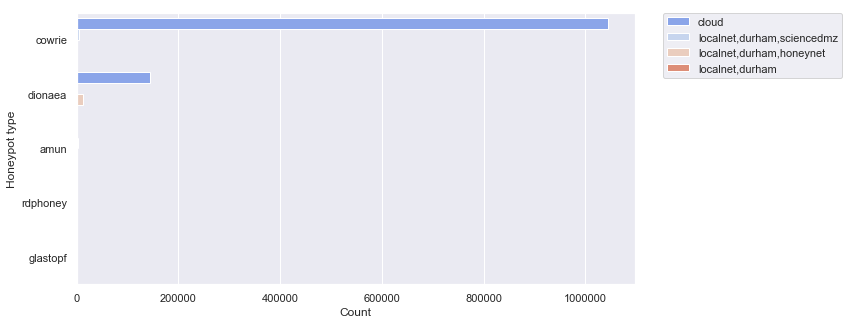

In [105]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize =(10,5))
fig = sns.countplot(y = 'app', data = data_analysis, palette= 'coolwarm', hue = "tags")
ax.set_ylabel("Honeypot type")
ax.set_xlabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)